In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [2]:
#download BTC-USD pair data from Yahoo Finance
btc_data = yf.download('BTC-USD', start = '2018-02-01', end = None)

[*********************100%***********************]  1 of 1 completed


In [3]:
#sent request 'https://api.alternative.me/fng/?limit=0&format=csv&date_format=cn' through Postman and saved the data in Json format

df_fng = pd.read_csv('fear_greed_index.csv',index_col=[0],parse_dates = [0]).dropna()

df_fng


,fng_value,fng_classification
date,,
2025-01-02,70.0,Greed
2025-01-01,66.0,Greed
2024-12-31,64.0,Greed
2024-12-30,65.0,Greed
2024-12-29,73.0,Greed
...,...,...
2018-02-05,11.0,Extreme Fear
2018-02-04,24.0,Extreme Fear
2018-02-03,40.0,Fear


In [4]:
btc_data

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2018-02-01,9170.540039,10288.799805,8812.280273,10237.299805,9959400448
2018-02-02,8830.750000,9142.280273,7796.490234,9142.280273,12726899712
2018-02-03,9174.910156,9430.750000,8251.629883,8852.120117,7263790080
2018-02-04,8277.009766,9334.870117,8031.220215,9175.700195,7073549824
2018-02-05,6955.270020,8364.839844,6756.680176,8270.540039,9285289984
...,...,...,...,...,...
2024-12-31,93429.203125,96090.601562,91914.031250,92643.250000,43625106843
2025-01-01,94419.757812,94929.867188,92788.125000,93425.101562,24519888919


In [5]:
btc_df = btc_data.loc[:,'Close']

In [6]:
btc_df.loc['2018-02-01']

Ticker
BTC-USD    9170.540039
Name: 2018-02-01 00:00:00, dtype: float64

In [7]:
btc_df = pd.read_csv('btc_df.csv')

In [8]:
btc_df.columns

Index(['Date', 'BTC-USD'], dtype='object')

In [9]:
btc_df['BTC-USD']

0        9170.540039
1        8830.750000
2        9174.910156
3        8277.009766
4        6955.270020
            ...     
2524    92643.210938
2525    93429.203125
2526    94419.757812
2527    96886.875000
2528    96744.546875
Name: BTC-USD, Length: 2529, dtype: float64

In [10]:
btc_df.rename(columns={'Date': 'date'}, inplace=True)

In [11]:
btc_df

,date,BTC-USD
0,2018-02-01,9170.540039
1,2018-02-02,8830.750000
2,2018-02-03,9174.910156
3,2018-02-04,8277.009766
4,2018-02-05,6955.270020
...,...,...
2524,2024-12-30,92643.210938
2525,2024-12-31,93429.203125
2526,2025-01-01,94419.757812
2527,2025-01-02,96886.875000


In [28]:
merged_data = pd.merge(btc_df, df_fng, on='date', how='inner')
df['date'] = pd.to_datetime(df['date'], errors='coerce')



In [13]:
merged_data

,date,BTC-USD,fng_value,fng_classification
0,2018-02-01,9170.540039,30.0,Fear
1,2018-02-02,8830.750000,15.0,Extreme Fear
2,2018-02-03,9174.910156,40.0,Fear
3,2018-02-04,8277.009766,24.0,Extreme Fear
4,2018-02-05,6955.270020,11.0,Extreme Fear
...,...,...,...,...
2519,2024-12-29,93530.226562,73.0,Greed
2520,2024-12-30,92643.210938,65.0,Greed
2521,2024-12-31,93429.203125,64.0,Greed
2522,2025-01-01,94419.757812,66.0,Greed


In [14]:
correlation = merged_data['BTC-USD'].corr(merged_data['fng_value'])
print(f"Correlation: {correlation}")


Correlation: 0.4242930280608611


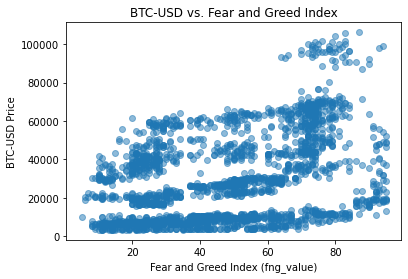

<Figure size 432x288 with 0 Axes>

In [15]:
plt.scatter(merged_data['fng_value'], merged_data['BTC-USD'], alpha=0.5)
plt.title('BTC-USD vs. Fear and Greed Index')
plt.xlabel('Fear and Greed Index (fng_value)')
plt.ylabel('BTC-USD Price')
plt.show()
plt.savefig('/home/x_ray_trader/ML/BTC_strategy_on_FnG/btc_vs_fng.png', dpi=300)
plt.show()


In [31]:
df['portfolio_value'] = pd.to_numeric(df['portfolio_value'], errors='coerce')
df = df.dropna(subset=['date', 'portfolio_value'])


In [26]:
# Initialize portfolio
cash = 1000  # Starting cash
btc_holdings = 0  # BTC owned
btc_per_trade = 50  # Buy/Sell amount in USD
df['action'] = None  # Track actions

# Simulate trading
for i, row in df.iterrows():
    btc_price = row['BTC-USD']
    fng_value = row['fng_value']
    
    # Buy during "Extreme Fear"
    if fng_value <= 15 and cash >= btc_per_trade:
        btc_bought = btc_per_trade / btc_price  # Amount of BTC to buy
        btc_holdings += btc_bought
        cash -= btc_per_trade
        df.loc[i, 'action'] = 'Buy'
    
    # Sell during "Extreme Greed"
    elif fng_value >= 85 and btc_holdings > 0:
        btc_sold = btc_per_trade / btc_price  # Amount of BTC to sell
        btc_holdings -= btc_sold
        cash += btc_per_trade
        df.loc[i, 'action'] = 'Sell'
    else:
        df.loc[i, 'action'] = 'Hold'

# Calculate portfolio value dynamically
df['cash'] = cash  # Final cash balance
df['btc_holdings'] = btc_holdings  # Final BTC holdings
final_btc_value = btc_holdings * df['BTC-USD'].iloc[-1]  # BTC value at last price
total_portfolio_value = cash + final_btc_value

# Results
print(f"Final Cash: ${cash:.2f}")
print(f"Final BTC Holdings: {btc_holdings:.6f} BTC")
print(f"Final Portfolio Value: ${total_portfolio_value:.2f}")

# Optional: Add portfolio value column
df['portfolio_value'] = df['cash'] + (df['btc_holdings'] * df['BTC-USD'])



Final Cash: $900.00
Final BTC Holdings: 0.139018 BTC
Final Portfolio Value: $14369.06


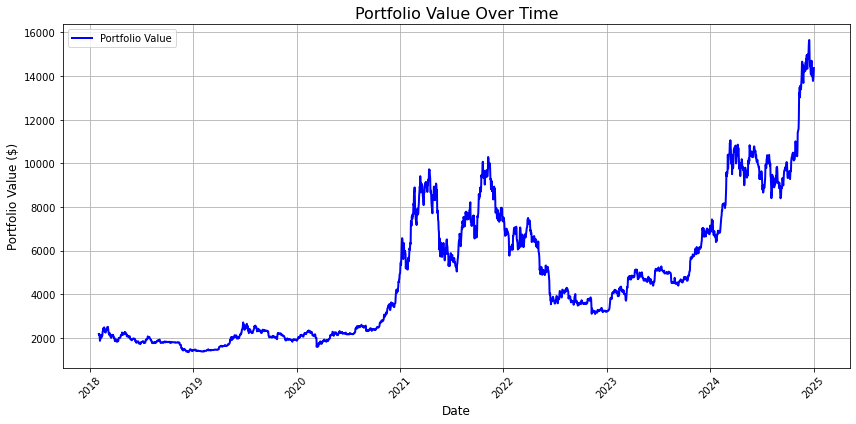

In [35]:
dates = df['date'].values
portfolio_values = df['portfolio_value'].values

plt.figure(figsize=(12, 6))
plt.plot(dates, portfolio_values, label='Portfolio Value', color='blue', linewidth=2)
plt.title('Portfolio Value Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Portfolio Value ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

